# Collisional Ionization Equilibrium — Carbon (C⁰ → C⁶⁺)

Consider carbon with 7 ionization stages: C⁰, C⁺, C²⁺, C³⁺, C⁴⁺, C⁵⁺, C⁶⁺.
Let $f_i$ be the **ion fraction** of stage $i$ (charge $i$), with
$$\sum_{i=0}^{6} f_i = 1.$$

Define:
- $\xi_i(T)$ : collisional ionization rate coefficient for $i \to i+1$ (units: cm³ s⁻¹),
- $\alpha_{i}(T)$ : recombination rate coefficient for $i \to i-1$ (units: cm³ s⁻¹),
- $n_e$ : electron density (cm⁻³).

**Steady-state (collisional ionization equilibrium)** for interior stages $1\le i\le5$:
$$
n_e\,\xi_{i-1}\,n_{i-1} \;+\; n_e\,\alpha_{i+1}\,n_{i+1}
\;=\; n_e\,\xi_{i}\,n_i \;+\; n_e\,\alpha_{i}\,n_i.
$$

Divide by $n_e n_\text{C}$ (with $n_i = f_i n_C$) to get the compact form:
$$
\xi_{i-1} f_{i-1} + \alpha_{i+1} f_{i+1} = (\xi_i + \alpha_i)\, f_i,\qquad (1\le i\le5).
$$

Boundary equations:

- For $i=0$ (neutral):
$$
\alpha_1 f_1 = \xi_0 f_0.
$$

- For $i=6$ (fully stripped):
$$
\xi_5 f_5 = \alpha_6 f_6.
$$

From the boundary relations one finds the **ratio recurrence**
$$
\frac{f_{i+1}}{f_i} = \frac{\xi_i}{\alpha_{i+1}}\qquad (i=0,1,\dots,5).
$$

Thus each fraction can be written in terms of $f_0$:
$$
f_i = f_0 \prod_{k=0}^{i-1} \frac{\xi_k}{\alpha_{k+1}}.
$$

Normalization $\sum_{i=0}^6 f_i = 1$ gives
$$
f_0 = \frac{1}{1 + \displaystyle\sum_{i=1}^{6}\prod_{k=0}^{i-1}\frac{\xi_k}{\alpha_{k+1}}}
$$
and then $f_i$ for all $i$ follow.

---

## Numerical instructions (Colab code cell follows)

1. Provide arrays (or values) of $\xi_i(T)$ and $\alpha_i(T)$ for the temperatures you want to evaluate.
2. For a single temperature (e.g. $T=10^5\,$K) plug in the coefficients at that $T$ and run the code cell to compute the $f_i$.
3. For a temperature grid, provide the coefficients as functions of $T$ (or tabulated values) and run the plotting cell to get ion fractions vs $T$ (log–log).

**Important:** Replace the placeholder rate arrays in the code cell with the real numbers from your table/email.


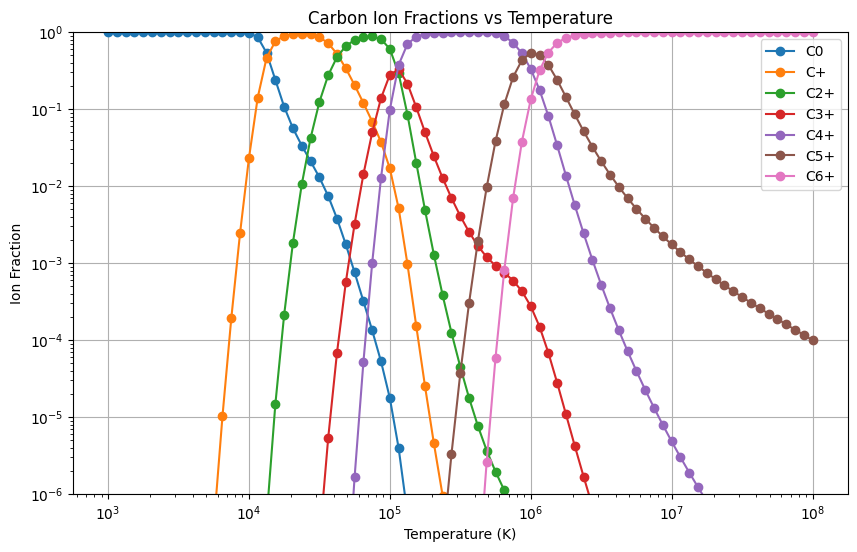

At T = 1e+05 K:
C0: 1.772e-05
C+: 1.701e-02
C2+: 6.059e-01
C3+: 2.791e-01
C4+: 9.795e-02
C5+: 2.634e-20
C6+: 3.035e-44


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('rate_coeffs_C.txt', skiprows=2)
T = data[:, 0]

fractions = []
for i in range(len(T)):
    # Get rates for this temperature
    xi = [data[i, 1], data[i, 3], data[i, 5], data[i, 7], data[i, 9], data[i, 11]]
    alpha = [data[i, 2], data[i, 4], data[i, 6], data[i, 8], data[i, 10], data[i, 12]]

    # Calculate ratios
    r1 = xi[0]/alpha[0] if alpha[0] > 0 else 0
    r2 = xi[1]/alpha[1] if alpha[1] > 0 else 0
    r3 = xi[2]/alpha[2] if alpha[2] > 0 else 0
    r4 = xi[3]/alpha[3] if alpha[3] > 0 else 0
    r5 = xi[4]/alpha[4] if alpha[4] > 0 else 0
    r6 = xi[5]/alpha[5] if alpha[5] > 0 else 0

    # Calculate populations
    n0 = 1.0
    n1 = n0 * r1
    n2 = n1 * r2
    n3 = n2 * r3
    n4 = n3 * r4
    n5 = n4 * r5
    n6 = n5 * r6

    # Total and fractions
    total = n0 + n1 + n2 + n3 + n4 + n5 + n6
    f0 = n0/total
    f1 = n1/total
    f2 = n2/total
    f3 = n3/total
    f4 = n4/total
    f5 = n5/total
    f6 = n6/total

    fractions.append([f0, f1, f2, f3, f4, f5, f6])

fractions = np.array(fractions)

# Plot
plt.figure(figsize=(10, 6))
plt.loglog(T, fractions[:, 0], 'o-', label='C0')
plt.loglog(T, fractions[:, 1], 'o-', label='C+')
plt.loglog(T, fractions[:, 2], 'o-', label='C2+')
plt.loglog(T, fractions[:, 3], 'o-', label='C3+')
plt.loglog(T, fractions[:, 4], 'o-', label='C4+')
plt.loglog(T, fractions[:, 5], 'o-', label='C5+')
plt.loglog(T, fractions[:, 6], 'o-', label='C6+')

plt.xlabel('Temperature (K)')
plt.ylabel('Ion Fraction')
plt.title('Carbon Ion Fractions vs Temperature')
plt.legend()
plt.grid(True)
plt.ylim(1e-6, 1)
plt.show()

# Print values at T=10^5 K
for i in range(len(T)):
    if abs(T[i] - 1e5) < 1000:
        print(f"At T = {T[i]:.0e} K:")
        print(f"C0: {fractions[i, 0]:.3e}")
        print(f"C+: {fractions[i, 1]:.3e}")
        print(f"C2+: {fractions[i, 2]:.3e}")
        print(f"C3+: {fractions[i, 3]:.3e}")
        print(f"C4+: {fractions[i, 4]:.3e}")
        print(f"C5+: {fractions[i, 5]:.3e}")
        print(f"C6+: {fractions[i, 6]:.3e}")
        break


# Assignment 2 — Q2 (Strömgren sphere, concise problem + main equation for numerical solution)

**Problem (restated concisely).**  
A star with radius $R_\star = 20\ \text{light s}$ and blackbody temperature $T_\star = 3\times10^4\ \text{K}$ is embedded in a uniform, neutral H medium with number density $n_H = 100\ \text{cm}^{-3}$ and temperature $T_0=100\ \text{K}$.  
When the star switches on it produces an ionized region (Strömgren sphere). The simple analytic Strömgren radius $r_{\rm st}$ assumes a sharp boundary and full ionization inside; here we want the *smooth* ionization profile.

You are given:
- Ionized region temperature $T_s = 1.5\times10^4\ \text{K}$ (use $T_4\equiv T_s/10^4$).
- Photo-ionization cross section for H:
  $$
  \sigma_H(E)=10^{-18}\left(\frac{E}{13.6\ \text{eV}}\right)^{-3.5}\ \text{cm}^2.
  $$
- Recombination coefficients:
  $$
  \alpha_A = 4.13\times10^{-13}\,T_4^{-0.713}\ \text{cm}^3\ \text{s}^{-1},\qquad
  \alpha_B = 2.56\times10^{-13}\,T_4^{-0.82}\ \text{cm}^3\ \text{s}^{-1}.
  $$
Assume the gas density remains constant during the ionization front expansion.

---

## Main equations — ionization balance and radiative transfer (to solve numerically)

Let the neutral fraction be
$$
x(r)\equiv\frac{n_{H^0}(r)}{n_H},\qquad
\text{so ionized fraction } y(r)=1-x(r).
$$

**(1) Photoionization rate per neutral atom.**  
Using the stellar luminosity per Hz $L_\nu$ (blackbody),
$$
L_\nu = 4\pi^2 R_\star^2\,B_\nu(T_\star),\qquad
B_\nu(T)=\frac{2h\nu^3}{c^2}\frac{1}{e^{h\nu/kT}-1},
$$
the (attenuated) specific energy flux at radius $r$ is
$$
F_\nu(r)=\frac{L_\nu}{4\pi r^2}\,e^{-\tau_\nu(r)},
$$
with the frequency-dependent optical depth from the star to radius $r$,
$$
\tau_\nu(r)=\int_0^r n_{H^0}(r')\,\sigma_\nu\,dr' = n_H\int_0^r x(r')\,\sigma_\nu\,dr'.
$$
The **photoionization rate per neutral atom** is then
$$
\Gamma(r)\;=\;\int_{\nu_0}^{\infty}\frac{F_\nu(r)}{h\nu}\,\sigma_\nu\,d\nu
\;=\;\int_{\nu_0}^{\infty}\frac{L_\nu}{4\pi r^2 h\nu}\,e^{-\tau_\nu(r)}\,\sigma_\nu\,d\nu,
$$
where $\nu_0$ is the H ionization threshold ($13.6\ \text{eV}$).

---

**(2) Local ionization equilibrium (steady state).**  
At radius $r$ collisional ionizations are ignored and photoionization balances recombination:
$$
n_{H^0}(r)\,\Gamma(r) \;=\; n_e(r)\,n_p(r)\,\alpha(T_s).
$$
For pure H, $n_e=n_p=n_H(1-x)=n_H y$, so
$$
n_H x(r)\,\Gamma(r) \;=\; n_H^2\,y(r)^2\,\alpha(T_s).
$$
Divide by $n_H$ and write $y=1-x$:
$$
x\,\Gamma \;=\; n_H \alpha\, (1-x)^2. \tag{★}
$$

This is the key algebraic relation at each radius: it gives $x(r)$ in terms of $\Gamma(r)$ (which itself depends on the *integral* of $x$ through $\tau_\nu$).

---

**(3) Explicit local solution (useful numerically).**  
Let $y=1-x$. Equation (★) becomes a quadratic in $y$:
$$
n_H\alpha\, y^2 + \Gamma\,y - \Gamma = 0.
$$
The physically relevant root ($0\le y\le1$) is
$$
y(r)=\frac{-\Gamma(r) + \sqrt{\Gamma(r)^2 + 4\,n_H\alpha\,\Gamma(r)}}{2\,n_H\alpha},
$$
and hence
$$
x(r)=1-y(r).
$$
So once $\Gamma(r)$ is known, $x(r)$ follows algebraically.

---

## Numerical solution strategy (concise algorithm)

1. **Choose recombination case:** set $\alpha=\alpha_A$ or $\alpha_B$ at $T_s$ (use $T_4$).
2. **Energy/frequency grid:** discretize photon energies from $E_{\rm min}=13.6\ \text{eV}$ to a practical $E_{\rm max}$ (e.g. 100–200 eV) into $N_E$ bins. For each energy convert to $\nu$ and compute $\sigma_\nu$ via the given power law and $L_\nu$ from the blackbody.
3. **Radial grid:** define $r$ from $R_\star$ out to several times $r_{\rm st}$ (use classic Strömgren radius estimate with $\alpha_B$ for a reference):
   $$
   r_{\rm st} = \left(\frac{3 Q_H}{4\pi \alpha_B n_H^2}\right)^{1/3},\qquad
   Q_H=\int_{\nu_0}^{\infty}\frac{L_\nu}{h\nu}\,d\nu.
   $$
4. **Outward march (causal integration):**
   - Initialize $\tau_\nu(0)=0$.
   - For each radial step $r_i$ (from small to large):
     a. compute $F_\nu(r_i)=\dfrac{L_\nu}{4\pi r_i^2}e^{-\tau_\nu(r_{i-1})}$ (use optical depth accumulated to the previous radius for attenuation of photons reaching $r_i$).  
     b. compute $\Gamma(r_i)\approx\sum_{j=1}^{N_E}\dfrac{F_{\nu_j}(r_i)}{h\nu_j}\,\sigma_{\nu_j}\,\Delta\nu_j$.  
     c. compute $y(r_i)$ from the quadratic formula above and then $x(r_i)=1-y(r_i)$.  
     d. update the optical depth incrementally for each energy:  
        $\tau_{\nu_j}(r_i)=\tau_{\nu_j}(r_{i-1}) + n_H\,x(r_i)\,\sigma_{\nu_j}\,\Delta r_i$.
   - Continue until outer radius reached.
5. **Band flux to plot:** the energy flux in the band $13.6$–$20\ \text{eV}$ at radius $r$ is
   $$
   F_{\rm band}(r)=\int_{E_1}^{E_2} F_E(r)\,dE \;\simeq\; \sum_j F_{\nu_j}(r)\,\Delta\nu_j,
   $$
   and you may plot e.g. $\nu F_\nu$ representative values or the integrated $F_{\rm band}$ versus $r/r_{\rm st}$.
6. **Plotting:** plot $x(r/r_{\rm st})$ and $F_{\rm band}(r/r_{\rm st})$ with linear $x$-axis and logarithmic $y$-axis. Limit the y-range to 6 orders of magnitude (e.g. $10^{-6}$ to $1$ for fractions, and choose a corresponding lower limit for flux).

---

## Notes / practical remarks
- For computing $Q_H$ and $\Gamma$ you must integrate over frequencies; numerically, integrating in energy (eV) space is convenient.  
- Use the blackbody $L_\nu=4\pi^2R_\star^2B_\nu(T_\star)$ and remember unit conversions (e.g. eV↔Hz: $E\,[\text{erg}]=h\nu$ with $1\ \text{eV}=1.602\times10^{-12}\ \text{erg}$).  
- The outward marching scheme above is stable because $\tau(r)$ only depends on interior $x(r')$ for $r'<r$.  
- Use a fine energy grid near 13.6 eV because the cross section is steep ($\sigma\propto E^{-3.5}$).  
- For reference Strömgren radius use $\alpha_B$ (case B) when computing $r_{\rm st}$.

---

### Final compact summary (equations to implement numerically)
1. $$\tau_\nu(r)=n_H\int_0^r x(r')\sigma_\nu\,dr'.$$
2. $$\Gamma(r)=\int_{\nu_0}^{\infty}\frac{L_\nu}{4\pi r^2 h\nu}\,e^{-\tau_\nu(r)}\,\sigma_\nu\,d\nu.$$
3. $$y(r)=\frac{-\Gamma + \sqrt{\Gamma^2 + 4n_H\alpha\Gamma}}{2n_H\alpha},\qquad x(r)=1-y(r).$$

Implement these three relations with the outward marching algorithm described above to produce the required plots for both $\alpha_A$ and $\alpha_B$.

---


Q = 1.3554593884906711e+48
rA = 4.711946009759355e+18  rB = 5.606832593147497e+18


/tmp/ipython-input-453546010.py:54: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  I = np.trapz(att*cs,E)/(4*np.pi*rr**2)
/tmp/ipython-input-453546010.py:59: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  f.append(np.trapz(att*E/h/(4*np.pi*rr**2),E))


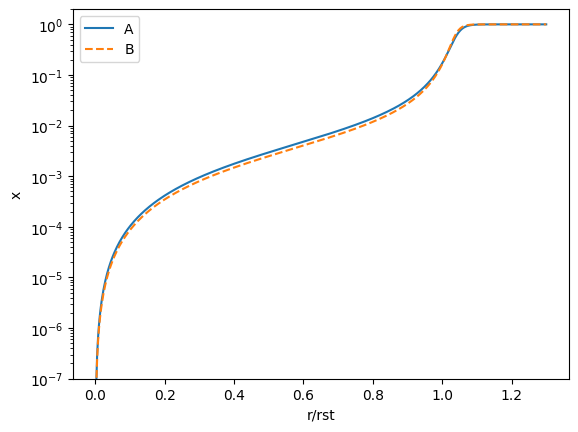

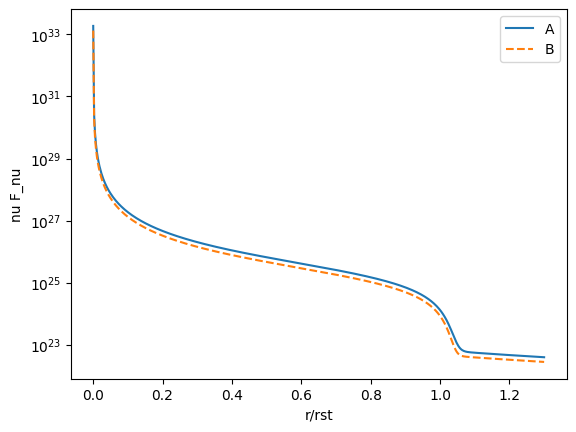

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

h = 6.626e-27
c = 2.998e10
k = 1.381e-16
eV = 1.602e-12

T = 30000.0
R = 20*c
n = 100.0
Ts = 1.5e4

alphaA = 4.13e-13*(Ts/1e4)**-0.713
alphaB = 2.56e-13*(Ts/1e4)**-0.82

Emin = 13.6*eV
Emax = 20.0*eV

def sigma(E):
    if E > Emin:
        return 1e-18*(E/Emin)**-3.5
    else:
        return 0.0

def spectrum(E):
    return 8*np.pi**2*R**2*E**2/(h**3*c**2*(np.exp(E/(k*T))-1))

def Q():
    val, _ = quad(spectrum, Emin, Emax)
    return val

Qval = Q()
print("Q =", Qval)

def rstrom(alpha):
    return ((3*Qval)/(4*np.pi*alpha*n**2))**(1/3)

rA = rstrom(alphaA)
rB = rstrom(alphaB)
print("rA =", rA, " rB =", rB)

def profile(alpha, r_s):
    r = np.linspace(1e-4*r_s, 1.3*r_s, 500)
    dr = r[1]-r[0]
    E = np.logspace(np.log10(Emin), np.log10(Emax), 200)
    cs = np.array([sigma(e) for e in E])
    sp = np.array([spectrum(e) for e in E])
    x, f = [], []
    tau = np.zeros(len(E))
    for rr in r:
        att = sp*np.exp(-tau)
        I = np.trapz(att*cs,E)/(4*np.pi*rr**2)
        Rpar = I/(n*alpha)
        xx = ((2+Rpar)-np.sqrt((2+Rpar)**2-4))/2
        x.append(xx)
        tau += n*xx*cs*dr
        f.append(np.trapz(att*E/h/(4*np.pi*rr**2),E))
    return r/r_s, np.array(x), np.array(f)

rA_,xA,fA = profile(alphaA,rA)
rB_,xB,fB = profile(alphaB,rB)

plt.semilogy(rA_,xA,label="A")
plt.semilogy(rB_,xB,"--",label="B")
plt.xlabel("r/rst"); plt.ylabel("x")
plt.legend(); plt.ylim(1e-7,2); plt.show()

plt.semilogy(rA_,fA,label="A")
plt.semilogy(rB_,fB,"--",label="B")
plt.xlabel("r/rst"); plt.ylabel("nu F_nu")
plt.legend(); #plt.ylim(fB.max()/1e6,fB.max()*1.5);
plt.show()
